<a href="https://colab.research.google.com/github/ympdl/Analytica/blob/main/Analytica_Fase_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.1 Numpy

In [ ]:
# 1) Importação da biblioteca
import numpy as np
import math

# 4) Iteração em um Numpy array
array = np.array([5.5, 3.8, 9, 7.5, 10.0, 9.9, 8.5])

# calculando media
total = 0
for valores in array:
    total += valores  # Somando os valores

media = total / len(array)
print("A média dos valores é:", media)

# calcule o desvio do padrão
soma = 0
for valores in array:
    soma += (valores - media) ** 2

desvio_padrao = (soma / len(array)) ** 0.5
print("O desvio padrão dos valores é:", desvio_padrao)

A média dos valores é: 7.742857142857142
O desvio padrão dos valores é: 2.155959940561541


In [ ]:
# 5) Funções facilitadoras:
# ordene os elementos

array = np.array([5.5, 3.8, 9, 7.5, 10.0, 9.9, 8.5])

ordenado = np.sort(array)
print(ordenado)

# dimensao os elementos
print(np.shape(array))

# calculando a media
print(np.mean(array))

# calcular o desvio padrão
print(np.std(array))

# calcular max e min
print(np.max(array))
print(np.min(array))

# números aleatórios

random = np.random.randint(0, 11, size=100)

# Calculando a média
media_random = np.mean(random)

# Calculando o desvio padrão
desvio_random = np.std(random)

# Encontrando o maior valor
maior = np.max(random)

# Encontrando o menor valor
menor = np.min(random)

# Exibindo os resultados
print(f"Média: {media_random}")
print(f"Desvio padrão: {desvio_random}")
print(f"Maior valor: {maior}")
print(f"Menor valor: {menor}")

[ 3.8  5.5  7.5  8.5  9.   9.9 10. ]
(7,)
7.742857142857142
2.155959940561541
10.0
3.8
Média: 4.86
Desvio padrão: 3.0887537940081917
Maior valor: 10
Menor valor: 0


# 1.2 Pandas

In [ ]:
import pandas as pd

df = pd.read_csv('dados.csv')
print(df)

# filtrar para pegar somente 1991
filtragem_a = df[df['ano'] == 1991]

#pegar o idhm
filtragem_i = filtragem_a['idhm']

#calcular a media
media = filtragem_i.mean()

print(f"A média do idhm é: {media}")

estados_maior = filtragem_a[filtragem_a['idhm'] > media] # vendo qual está acima da média
estados_maior = estados_maior['sigla_uf'].unique() # pegando somente a coluna das siglas
print(f"Estados acima da media:\n{estados_maior}")

print("\n")

# ordenando de acordo com o idhm
ordenado = filtragem_a.sort_values(by = 'idhm', ascending=False)
print(ordenado.head(5)) # mostrando os 5 maiores

# analisando os dados com as funções
min = filtragem_a['idhm'].min()
max = filtragem_a['idhm'].max()

estado_min = filtragem_a.loc[filtragem_a['idhm'].idxmin(), 'sigla_uf']
estado_max = filtragem_a.loc[filtragem_a['idhm'].idxmax(), 'sigla_uf']

print("\n")

print(f"Menor IDH de 1991: {min} Estado: {estado_min}")
print(f"Maior IDH de 1991: {max} Estado: {estado_max}")

     ano sigla_uf  expectativa_vida  populacao_urbana  populacao_rural   idhm
0   1991       AC             63.72            258520           159198  0.402
1   1991       AL             58.10           1482033          1032067  0.370
2   1991       AM             63.67           1502754           600489  0.430
3   1991       AP             65.05            234131            55266  0.472
4   1991       BA             59.94           7016770          4851221  0.386
..   ...      ...               ...               ...              ...    ...
76  2010       RS             75.38           9100291          1593638  0.746
77  2010       SC             76.61           5247913          1000523  0.774
78  2010       SE             71.84           1520366           547651  0.665
79  2010       SP             75.69          39585251          1676948  0.783
80  2010       TO             72.56           1090106           293339  0.699

[81 rows x 6 columns]
A média do idhm é: 0.45392592592592584
Es

# 1.3 Matplotlib

['AC' 'AL' 'AM' 'AP' 'BA' 'CE' 'DF' 'ES' 'GO' 'MA' 'MG' 'MS' 'MT' 'PA'
 'PB' 'PE' 'PI' 'PR' 'RJ' 'RN' 'RO' 'RR' 'RS' 'SC' 'SE' 'SP' 'TO']
[  258520  1482033  1502754   234131  7016770  4162007  1515889  1924588
  3247676  1972421 11786893  1414447  1485110  2596388  2052066  5051654
  1367184  6197953 12199641  1669267   659327   140818  6996542  3208537
  1002877 29314861   530636]


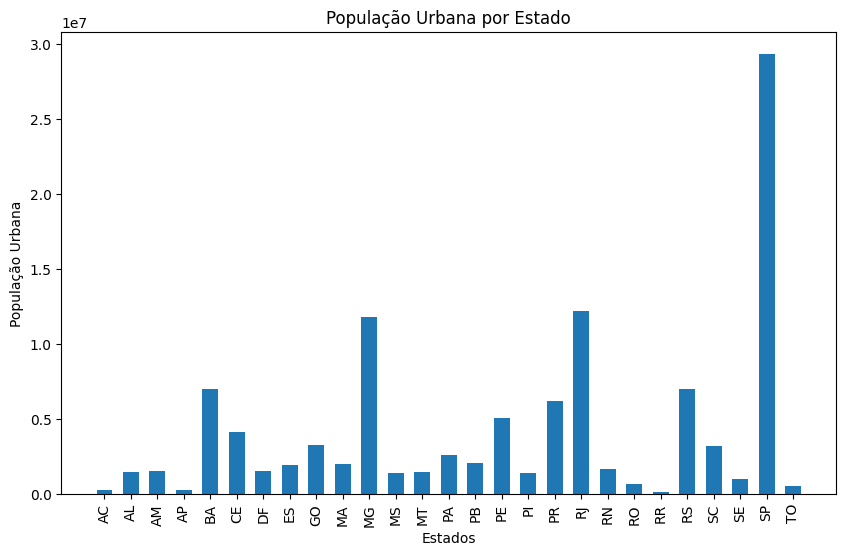

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv')
# filtrar para pegar somente 1991
filtragem_a = df[df['ano'] == 1991]

# proporção entre População Urbana e os estados brasileiros
estados = filtragem_a['sigla_uf'].unique()
populacao_urbana =  filtragem_a['populacao_urbana'].unique()

print(estados)
print(populacao_urbana)

plt.figure(figsize=(10, 6))
plt.bar(estados, populacao_urbana, width = 0.6)
plt.xlabel('Estados')
plt.ylabel('População Urbana')
plt.title('População Urbana por Estado')
plt.xticks(rotation=90)
plt.show()

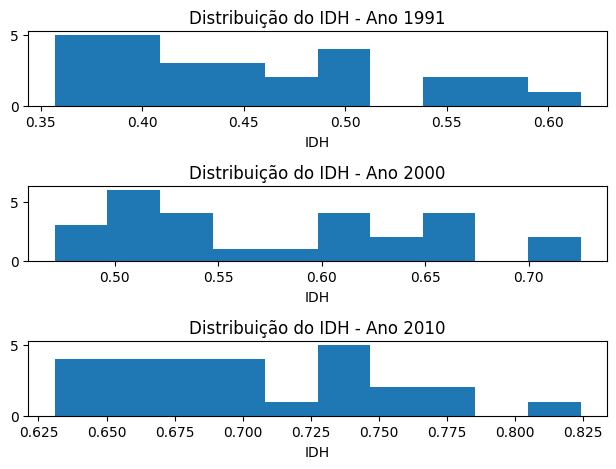

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv')

anos = df['ano'].unique() # pegando somente a coluna dos anos

for i, ano in enumerate(anos):
    # filtrar os dados para o ano
    df_ano = df[df['ano'] == ano]

    # criar o histograma para o IDH
    plt.subplot(len(anos), 1, i + 1)
    plt.hist(df_ano['idhm'])
    plt.title(f"Distribuição do IDH - Ano {ano}")
    plt.xlabel("IDH")

plt.tight_layout()
plt.show()

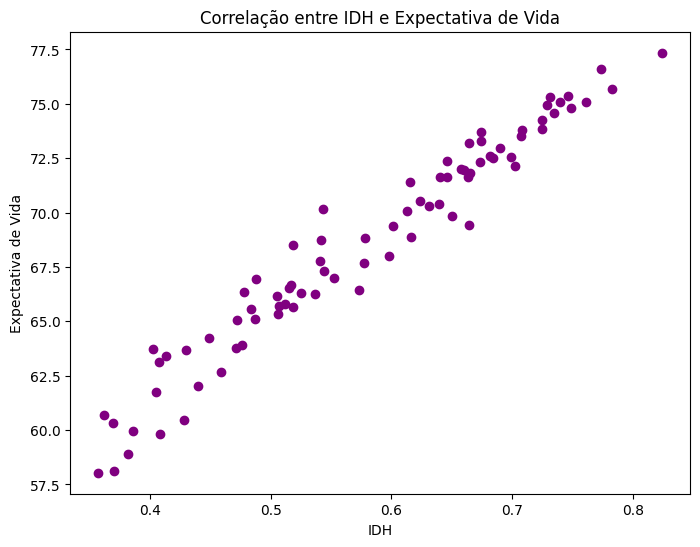

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv')

idh = df['idhm']
expectativa_vida = df['expectativa_vida']

plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura
plt.scatter(idh, expectativa_vida, color ='purple')

# Adicionar rótulos e título ao gráfico
plt.xlabel('IDH')
plt.ylabel('Expectativa de Vida')
plt.title('Correlação entre IDH e Expectativa de Vida')

# Exibir o gráfico
plt.show()

Conclusão: O gráfico mostra uma forte correlação positiva entre IDH e expectativa de vida. À medida que o IDH aumenta, a expectativa de vida também cresce, indicando que estados com melhores condições de vida tendem a viver mais.

# 1.4 Desafio Final

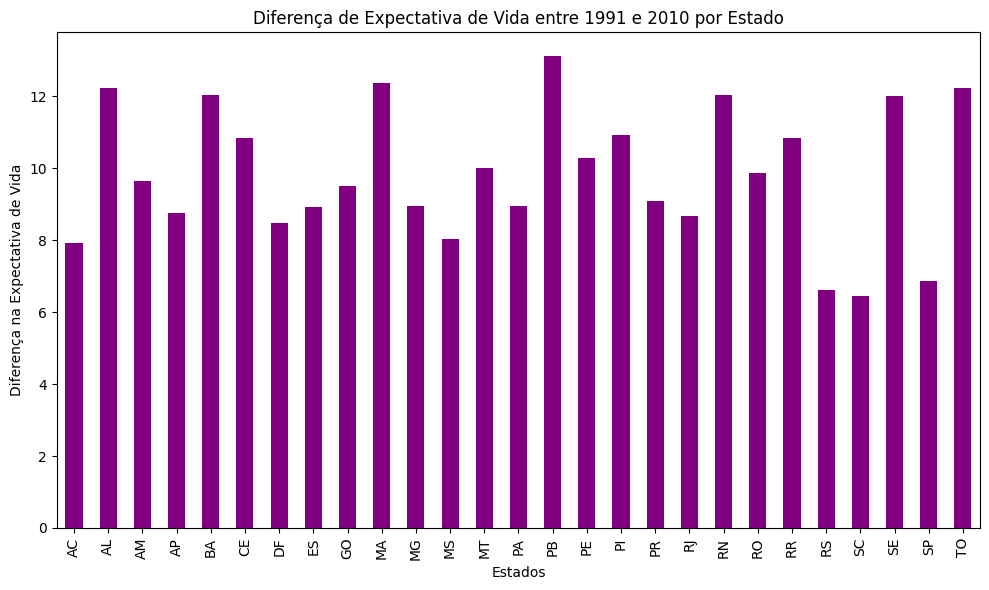

Estados com aumento de pelo menos 10 anos na expectativa de vida entre 1991 e 2010:
sigla_uf
AL    12.22
BA    12.03
CE    10.84
MA    12.36
MT    10.01
PB    13.12
PE    10.28
PI    10.91
RN    12.04
RR    10.85
SE    12.01
TO    12.24
Name: expectativa_vida, dtype: float64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dados.csv')

# filtrando os anos
filtragem_1991 = df[df['ano'] == 1991].set_index('sigla_uf')
filtragem_2010 = df[df['ano'] == 2010].set_index('sigla_uf')

diferenca = filtragem_2010['expectativa_vida'] - filtragem_1991['expectativa_vida']

plt.figure(figsize=(10, 6))
diferenca.plot.bar(color = 'purple')
plt.xlabel('Estados')
plt.ylabel('Diferença na Expectativa de Vida')
plt.title('Diferença de Expectativa de Vida entre 1991 e 2010 por Estado')

# Ajustar a exibição dos rótulos dos estados
plt.xticks(rotation=90)
plt.tight_layout()

# Exibir o gráfico
plt.show()

estados = diferenca[diferenca >= 10]
print("Estados com aumento de pelo menos 10 anos na expectativa de vida entre 1991 e 2010:")
print(estados)